<a href="https://colab.research.google.com/github/Vaishnav-Pillai/ML_NN_Digit_Recognizer/blob/main/Digit_recognition_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential


In [23]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()


In [24]:
train_x = train_x.astype('float32') / 255 # Similar to feature scaling
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [25]:
# Preparing the dataset
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)



In [26]:
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=10,activation="softmax"))

In [27]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [28]:
H=model.fit(train_x,train_y,batch_size=2048,epochs=100)

Epoch 1/100
30/30 [==============================] - 2s 7ms/step - loss: 1.7459 - accuracy: 0.3871
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.7709 - accuracy: 0.7512
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.4665 - accuracy: 0.8669
Epoch 4/100
30/30 [==============================] - 0s 10ms/step - loss: 0.3535 - accuracy: 0.9050
Epoch 5/100
30/30 [==============================] - 0s 9ms/step - loss: 0.2930 - accuracy: 0.9223
Epoch 6/100
30/30 [==============================] - 0s 10ms/step - loss: 0.2540 - accuracy: 0.9340
Epoch 7/100
30/30 [==============================] - 0s 9ms/step - loss: 0.2228 - accuracy: 0.9431
Epoch 8/100
30/30 [==============================] - 0s 9ms/step - loss: 0.2084 - accuracy: 0.9467
Epoch 9/100
30/30 [==============================] - 0s 9ms/step - loss: 0.1862 - accuracy: 0.9524
Epoch 10/100
30/30 [==============================] - 0s 9ms/step - loss: 0.1678 - accuracy: 0.9563
Epoch 1

In [29]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

10/10 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.9817
Accuracy:  0.9817000031471252


In [30]:
H.history.keys() # To check which information does it contain

dict_keys(['loss', 'accuracy'])

In [31]:
H.history['accuracy']

[0.38706666231155396,
 0.7511666417121887,
 0.8669333457946777,
 0.9049500226974487,
 0.9223166704177856,
 0.9340000152587891,
 0.943149983882904,
 0.9466500282287598,
 0.9524499773979187,
 0.9562666416168213,
 0.9601500034332275,
 0.9629666805267334,
 0.963949978351593,
 0.9663833379745483,
 0.9679833054542542,
 0.9691166877746582,
 0.970966637134552,
 0.9726333618164062,
 0.9726666808128357,
 0.9740166664123535,
 0.973966658115387,
 0.9755666851997375,
 0.9771333336830139,
 0.9778000116348267,
 0.9785833358764648,
 0.9792333245277405,
 0.9784833192825317,
 0.9797833561897278,
 0.9806166887283325,
 0.9819166660308838,
 0.9821666479110718,
 0.9816833138465881,
 0.9828166961669922,
 0.982283353805542,
 0.9827166795730591,
 0.9836000204086304,
 0.9848333597183228,
 0.9842000007629395,
 0.9845499992370605,
 0.9848333597183228,
 0.9851166605949402,
 0.9856500029563904,
 0.9866333603858948,
 0.9867500066757202,
 0.9863499999046326,
 0.9877333045005798,
 0.9866499900817871,
 0.98676669597625

In [32]:
import plotly.express as px

px.line(y=H.history['accuracy'],title='Accuracy')

In [33]:
px.line(y=H.history['loss'],title='Loss')

## Predictions for your images (optional)

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [35]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3


In [36]:
from utils import *

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import keras.utils as image

In [38]:
def predict(img_path,model,con_dest='converted_img.jpg',threshold=135):
    num=cv2.imread(img_path)
    num=cv2.cvtColor(num, cv2.COLOR_BGR2GRAY)
    #num.resize(28,28)
    (thresh, num) = cv2.threshold(num, threshold, 255, cv2.THRESH_BINARY_INV)


    cv2.imwrite(con_dest,num)

    img = image.load_img(con_dest,color_mode = "grayscale",target_size=(28,28))
    plt.imshow(img)
    plt.title("Converted Image for Prediction")
    plt.show()
    img = image.img_to_array(img)
    test_img = (img.reshape((1,784)))/255.0
    ans=model.predict(test_img)

    print('Predictions for each class', ans)
    print('Predicted value is '+ str(np.argmax(ans)))

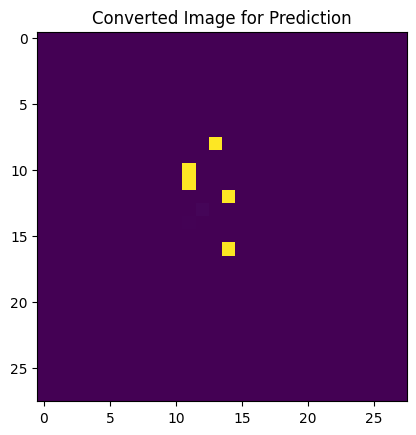

1/1 [==============================] - 0s 20ms/step
Predictions for each class [[0.01875523 0.09208331 0.03418684 0.17240858 0.02915405 0.12461624
  0.01018171 0.05278698 0.28880158 0.17702553]]
Predicted value is 8


In [45]:
predict('images/num_5.jpg',model=model,con_dest='images/con_num_23.jpg')